# Machine Learning Project - Tennis Ace 

## Project Goals

Create a linear regression model that predicts the outcome for a tennis player based on their playing habits. By analyzing and modeling the Association # Tennis Professionals (ATP) data, determine what it takes to be one of the best tennis players in the world.

Provided in tennis_stats.csv is data from the men’s professional tennis league, which is called the ATP (Association of Tennis Professionals). Data from the top 1500 ranked players in the ATP over the span of 2009 to 2017 are provided in file. The statistics recorded for each player in each year include service game (offensive) statistics, return game (defensive) statistics and outcomes. Load the csv into a DataFrame and investigate it to gain familiarity with the data.

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
tennis = pd.read_csv('tennis_stats.csv')
tennis

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716,Yann Marti,2010,0.41,0.66,0.23,0.45,0.50,1,0.75,8,...,0.23,0.36,12,0.67,0.45,0.53,0,1,9117,1062
1717,Mikhail Elgin,2012,0.41,0.60,0.30,0.36,0.60,3,0.60,13,...,0.33,0.43,10,0.40,0.45,0.46,16,20,89755,831
1718,Alexander Kudryavtsev,2012,0.40,0.64,0.21,0.42,0.42,4,0.25,13,...,0.07,0.29,14,0.57,0.40,0.51,0,1,44566,628
1719,Ivan Nedelko,2011,0.37,0.30,0.15,0.24,0.41,1,0.00,5,...,0.00,0.26,6,0.17,0.26,0.26,0,1,17527,264


In [3]:
df = pd.DataFrame(tennis)
df

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716,Yann Marti,2010,0.41,0.66,0.23,0.45,0.50,1,0.75,8,...,0.23,0.36,12,0.67,0.45,0.53,0,1,9117,1062
1717,Mikhail Elgin,2012,0.41,0.60,0.30,0.36,0.60,3,0.60,13,...,0.33,0.43,10,0.40,0.45,0.46,16,20,89755,831
1718,Alexander Kudryavtsev,2012,0.40,0.64,0.21,0.42,0.42,4,0.25,13,...,0.07,0.29,14,0.57,0.40,0.51,0,1,44566,628
1719,Ivan Nedelko,2011,0.37,0.30,0.15,0.24,0.41,1,0.00,5,...,0.00,0.26,6,0.17,0.26,0.26,0,1,17527,264


The ATP men’s tennis dataset includes a wide array of tennis statistics, which are described below:
Identifying Data

    Player: name of the tennis player
    Year: year data was recorded

Service Game Columns (Offensive)

    Aces: number of serves by the player where the receiver does not touch the ball
    DoubleFaults: number of times player missed both first and second serve attempts
    FirstServe: % of first-serve attempts made
    FirstServePointsWon: % of first-serve attempt points won by the player
    SecondServePointsWon: % of second-serve attempt points won by the player
    BreakPointsFaced: number of times where the receiver could have won service game of the player
    BreakPointsSaved: % of the time the player was able to stop the receiver from winning service game when they       had the chance
    ServiceGamesPlayed: total number of games where the player served
    ServiceGamesWon: total number of games where the player served and won
    TotalServicePointsWon: % of points in games where the player served that they won

Return Game Columns (Defensive)

    FirstServeReturnPointsWon: % of opponents first-serve points the player was able to win
    SecondServeReturnPointsWon: % of opponents second-serve points the player was able to win
    BreakPointsOpportunities: number of times where the player could have won the service game of the opponent
    BreakPointsConverted: % of the time the player was able to win their opponent’s service game when they had 
    the chance
    ReturnGamesPlayed: total number of games where the player’s opponent served
    ReturnGamesWon: total number of games where the player’s opponent served and the player won
    ReturnPointsWon: total number of points where the player’s opponent served and the player won
    TotalPointsWon: % of points won by the player

Outcomes

    Wins: number of matches won in a year
    Losses: number of matches lost in a year
    Winnings: total winnings in USD($) in a year
    Ranking: ranking at the end of year



Perform exploratory analysis on the data by plotting different features against the different outcomes. What relationships do you find between the features and outcomes? Do any of the features seem to predict the outcomes?

In [4]:
ATP = df[['Player','Year']]
ATP

,Player,Year
0,Pedro Sousa,2016
1,Roman Safiullin,2017
2,Pedro Sousa,2017
3,Rogerio Dutra Silva,2010
4,Daniel Gimeno-Traver,2017
...,...,...
1716,Yann Marti,2010
1717,Mikhail Elgin,2012
1718,Alexander Kudryavtsev,2012
1719,Ivan Nedelko,2011


In [5]:
x = df[['Aces','FirstServePointsWon','SecondServePointsWon','BreakPointsSaved','ServiceGamesWon',
        'TotalServicePointsWon','FirstServeReturnPointsWon', 'SecondServeReturnPointsWon',
        'BreakPointsConverted','ReturnGamesPlayed','ReturnGamesWon','ReturnPointsWon','TotalPointsWon']]
x

,Aces,FirstServePointsWon,SecondServePointsWon,BreakPointsSaved,ServiceGamesWon,TotalServicePointsWon,FirstServeReturnPointsWon,SecondServeReturnPointsWon,BreakPointsConverted,ReturnGamesPlayed,ReturnGamesWon,ReturnPointsWon,TotalPointsWon
0,0,0.50,0.50,0.43,0.50,0.50,0.38,0.39,0.14,9,0.11,0.38,0.43
1,7,0.62,0.33,0.57,0.67,0.57,0.26,0.07,0.00,9,0.00,0.20,0.41
2,2,0.60,0.53,0.40,0.65,0.59,0.28,0.44,0.38,19,0.16,0.34,0.45
3,2,0.64,0.59,0.40,0.80,0.63,0.34,0.33,0.33,14,0.14,0.34,0.49
4,1,0.54,0.33,0.50,0.50,0.50,0.00,0.33,0.00,3,0.00,0.20,0.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716,1,0.66,0.45,0.50,0.67,0.53,0.23,0.50,0.75,13,0.23,0.36,0.45
1717,3,0.60,0.36,0.54,0.40,0.46,0.30,0.60,0.60,9,0.33,0.43,0.45
1718,4,0.64,0.42,0.54,0.57,0.51,0.21,0.42,0.25,14,0.07,0.29,0.40
1719,1,0.30,0.24,0.00,0.17,0.26,0.15,0.41,0.00,7,0.00,0.26,0.26


In [6]:
y = df[['Wins','Winnings','Ranking']]
y

,Wins,Winnings,Ranking
0,1,39820,119
1,0,17334,381
2,4,109827,119
3,0,9761,125
4,0,32879,272
...,...,...,...
1716,0,9117,1062
1717,16,89755,831
1718,0,44566,628
1719,0,17527,264


Splitting Data into traning and testing data set

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state = 6)
x_train, x_test, y_train, y_test

(      Aces  FirstServePointsWon  SecondServePointsWon  BreakPointsSaved  \
 892    178                 0.75                  0.50              0.62   
 14       6                 0.56                  0.38              0.50   
 921    138                 0.69                  0.47              0.59   
 735    203                 0.72                  0.47              0.59   
 12       4                 0.72                  0.33              0.50   
 ...    ...                  ...                   ...               ...   
 1389    49                 0.64                  0.44              0.59   
 618      7                 0.60                  0.48              0.00   
 227     12                 0.72                  0.30              0.31   
 713    142                 0.70                  0.45              0.52   
 906    183                 0.71                  0.48              0.60   
 
       ServiceGamesWon  TotalServicePointsWon  FirstServeReturnPointsWon  \
 892      

In [8]:
print(x_train.shape)
print(x_test.shape)
 
print(y_train.shape)
print(y_test.shape)


(1376, 13)
(345, 13)
(1376, 3)
(345, 3)


In [9]:
mlr = LinearRegression()
mlr

LinearRegression()

In [10]:
mlr.fit(x_train,y_train)

LinearRegression()

In [11]:
y_predict = mlr.predict(x_test)

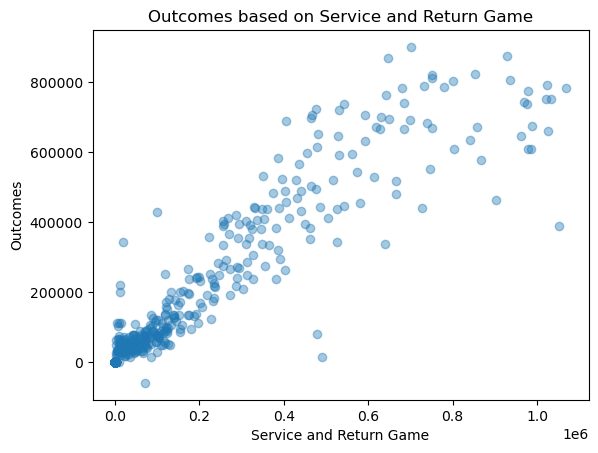

In [12]:
plt.scatter(y_test,y_predict,alpha=0.4)
plt.title('Outcomes based on Service and Return Game')
plt.ylabel('Outcomes')
plt.xlabel('Service and Return Game')
plt.show()

Use one feature from the dataset to build a single feature linear regression model on the data. Your model, at this point, should use only one feature and predict one of the outcome columns. Before training the model, split your data into training and test datasets so that you can evaluate your model on the test set. How does your model perform? Plot your model’s predictions on the test set against the actual outcome variable to visualize the performance.


In [13]:
x1 = df[['FirstServeReturnPointsWon']]
x1

,FirstServeReturnPointsWon
0,0.38
1,0.26
2,0.28
3,0.34
4,0.00
...,...
1716,0.23
1717,0.30
1718,0.21
1719,0.15


In [14]:
y1 = df[['Winnings']]
y1

,Winnings
0,39820
1,17334
2,109827
3,9761
4,32879
...,...
1716,9117
1717,89755
1718,44566
1719,17527


In [15]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, train_size = 0.8)
x1_train, x1_test, y1_train, y1_test

(      FirstServeReturnPointsWon
 975                        0.27
 1543                       0.33
 1439                       0.24
 1599                       0.15
 1251                       0.31
 ...                         ...
 1530                       0.10
 912                        0.26
 589                        0.27
 362                        0.35
 1519                       0.35
 
 [1376 rows x 1 columns],
       FirstServeReturnPointsWon
 1480                       0.26
 567                        0.30
 1329                       0.28
 1130                       0.28
 1186                       0.25
 ...                         ...
 201                        0.32
 1618                       0.32
 1539                       0.17
 1691                       0.16
 1157                       0.22
 
 [345 rows x 1 columns],
       Winnings
 975     482900
 1543     18127
 1439    330885
 1599     51358
 1251     71943
 ...        ...
 1530      1956
 912     928660
 589     

In [16]:
mlr = LinearRegression()
mlr.fit(x1_train,y1_train)

LinearRegression()

In [17]:
mlr.score(x1_test,y1_test)

0.029889936991462807

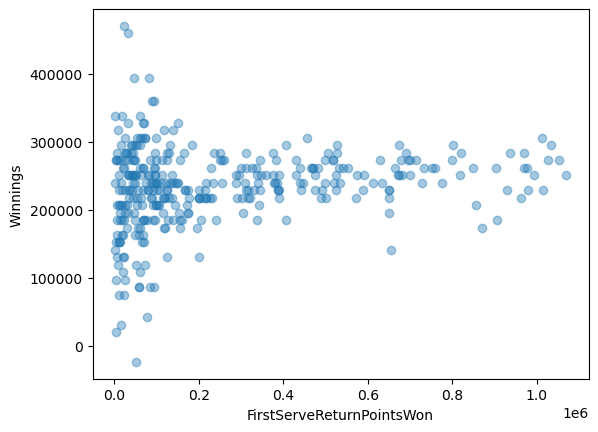

In [18]:
prediction = mlr.predict(x1_test)
plt.scatter(y1_test,prediction, alpha=0.4)
plt.ylabel('Winnings')
plt.xlabel('FirstServeReturnPointsWon')
plt.show()

Create a few more linear regression models that use one feature to predict one of the outcomes.

In [19]:
x2 = df[['BreakPointsOpportunities']]
x2

,BreakPointsOpportunities
0,7
1,0
2,8
3,6
4,0
...,...
1716,4
1717,5
1718,4
1719,5


In [20]:
y2 = df[['Winnings']]
y2

,Winnings
0,39820
1,17334
2,109827
3,9761
4,32879
...,...
1716,9117
1717,89755
1718,44566
1719,17527


In [21]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, train_size = 0.8)
x2_train, x2_test, y2_train, y2_test

(      BreakPointsOpportunities
 562                        377
 509                         93
 1046                        38
 1315                        27
 1623                         5
 ...                        ...
 1126                        68
 896                        249
 1616                        38
 1348                        20
 1096                       399
 
 [1376 rows x 1 columns],
       BreakPointsOpportunities
 374                        112
 797                          8
 1265                       123
 1386                        18
 1323                         2
 ...                        ...
 304                         38
 993                        198
 1246                        17
 464                        136
 604                        193
 
 [345 rows x 1 columns],
       Winnings
 562     929859
 509     272363
 1046     47298
 1315    154062
 1623     15526
 ...        ...
 1126    137521
 896     293952
 1616    140615
 1348     52805
 

In [22]:
mlr = LinearRegression()
mlr.fit(x2_train,y2_train)

LinearRegression()

In [23]:
mlr.score(x2_test,y2_test)

0.8030828205865161

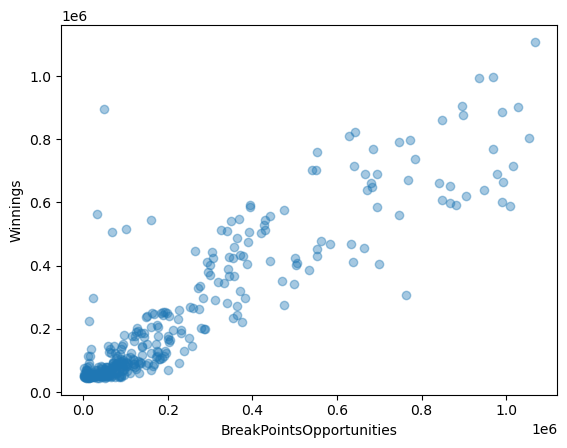

In [24]:
prediction = mlr.predict(x2_test)
plt.scatter(y2_test,prediction, alpha=0.4)
plt.ylabel('Winnings')
plt.xlabel('BreakPointsOpportunities')
plt.show()

Create a few linear regression models that use two features to predict yearly earnings. Which set of two features results in the best model?

In [25]:
x3 = df[['BreakPointsOpportunities','FirstServeReturnPointsWon']]
x3

,BreakPointsOpportunities,FirstServeReturnPointsWon
0,7,0.38
1,0,0.26
2,8,0.28
3,6,0.34
4,0,0.00
...,...,...
1716,4,0.23
1717,5,0.30
1718,4,0.21
1719,5,0.15


In [26]:
y3 = df[['Winnings']]
y3

,Winnings
0,39820
1,17334
2,109827
3,9761
4,32879
...,...
1716,9117
1717,89755
1718,44566
1719,17527


In [27]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, train_size = 0.8)
x3_train, x3_test, y3_train, y3_test

(      BreakPointsOpportunities  FirstServeReturnPointsWon
 833                         32                       0.28
 25                           2                       0.09
 987                        277                       0.28
 51                           0                       0.08
 1103                       478                       0.32
 ...                        ...                        ...
 430                        208                       0.27
 609                         60                       0.21
 1058                       118                       0.27
 932                        155                       0.32
 1044                        91                       0.29
 
 [1376 rows x 2 columns],
       BreakPointsOpportunities  FirstServeReturnPointsWon
 1063                         7                       0.48
 304                         38                       0.32
 1693                         0                       0.22
 1305                       

In [28]:
mlr = LinearRegression()
mlr.fit(x3_train,y3_train)

LinearRegression()

In [29]:
mlr.score(x3_test,y3_test)

0.8161913255124534

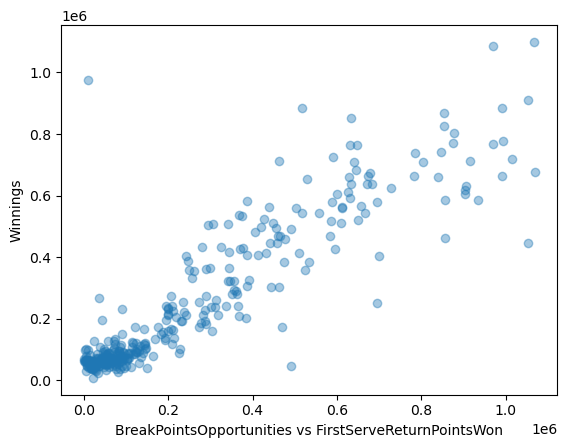

In [30]:
prediction = mlr.predict(x3_test)
plt.scatter(y3_test,prediction, alpha=0.4)
plt.ylabel('Winnings')
plt.xlabel('BreakPointsOpportunities vs FirstServeReturnPointsWon')
plt.show()